In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import os

Found GPU at: /device:GPU:0


In [2]:
mnist = input_data.read_data_sets("./mnist",one_hot=True)

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


In [0]:
total_epoch = 100
img_size= 28*28
z_dim = 128
n_hidden = 256
batch_size = 100
learning_rate = 0.001
X = tf.placeholder(tf.float32, [None, img_size])
Z = tf.placeholder(tf.float32, [None, z_dim])
a = tf.contrib.layers.xavier_initializer()

In [0]:
def generator(z_dim) :
  with tf.variable_scope("generator") as scope: 
    hidden = tf.layers.dense(z_dim , n_hidden , activation = tf.nn.tanh, kernel_initializer= a)
    output = tf.layers.dense(hidden, img_size, activation = tf.nn.sigmoid)
  return output

def discriminator(img_size, reuse=None) :
  with tf.variable_scope("discriminator") as scope :
    if reuse:
      scope.reuse_variables()
    hidden = tf.layers.dense(img_size, n_hidden , activation= tf.nn.tanh ,  kernel_initializer= a)
    output = tf.layers.dense(hidden , 1 , activation = None)
  return output

def get_noise(batch_size, z_dim) :
  return np.random.uniform(-1., 1. , size = [batch_size, z_dim])


In [0]:
G = generator(Z)
D_real = discriminator(X)
D_gene = discriminator(G,True)

loss_D_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real, labels = tf.ones_like(D_real)))
loss_D_gene = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(logits=D_gene, labels = tf.zeros_like(D_gene)))
loss_D = loss_D_real + loss_D_gene

loss_G = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_gene , labels=tf.ones_like(D_gene)))



In [0]:
vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='discriminator' )
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="generator")

train_D = tf.train.AdamOptimizer(learning_rate).minimize(loss_D , var_list=vars_D)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(loss_G , var_list=vars_G)


Epoch: 0000 D loss: 0.4339 G loss: 2.785
Epoch: 0001 D loss: 0.02785 G loss: 5.105
Epoch: 0002 D loss: 0.09018 G loss: 4.677
Epoch: 0003 D loss: 0.143 G loss: 3.697
Epoch: 0004 D loss: 0.1273 G loss: 4.52
Epoch: 0005 D loss: 0.2958 G loss: 3.47
Epoch: 0006 D loss: 0.3699 G loss: 4.496
Epoch: 0007 D loss: 0.2519 G loss: 3.614
Epoch: 0008 D loss: 0.1867 G loss: 4.044
Epoch: 0009 D loss: 0.204 G loss: 4.076
Epoch: 0010 D loss: 0.2511 G loss: 4.176
Epoch: 0011 D loss: 0.3249 G loss: 4.006
Epoch: 0012 D loss: 0.2203 G loss: 4.244
Epoch: 0013 D loss: 0.1613 G loss: 4.266
Epoch: 0014 D loss: 0.2105 G loss: 4.47
Epoch: 0015 D loss: 0.1451 G loss: 4.574
Epoch: 0016 D loss: 0.1774 G loss: 4.546
Epoch: 0017 D loss: 0.1991 G loss: 4.401
Epoch: 0018 D loss: 0.1635 G loss: 4.327
Epoch: 0019 D loss: 0.1636 G loss: 5.247
Epoch: 0020 D loss: 0.2505 G loss: 4.879
Epoch: 0021 D loss: 0.2056 G loss: 5.087
Epoch: 0022 D loss: 0.1982 G loss: 4.003
Epoch: 0023 D loss: 0.1527 G loss: 4.811
Epoch: 0024 D loss:

Epoch: 0069 D loss: 0.207 G loss: 3.935
Epoch: 0070 D loss: 0.3169 G loss: 3.974
Epoch: 0071 D loss: 0.2351 G loss: 4.489
Epoch: 0072 D loss: 0.2059 G loss: 4.25
Epoch: 0073 D loss: 0.1943 G loss: 3.77
Epoch: 0074 D loss: 0.1347 G loss: 4.117
Epoch: 0075 D loss: 0.1706 G loss: 3.811
Epoch: 0076 D loss: 0.2907 G loss: 3.37
Epoch: 0077 D loss: 0.2734 G loss: 3.811
Epoch: 0078 D loss: 0.3526 G loss: 4.249
Epoch: 0079 D loss: 0.2586 G loss: 4.159
Epoch: 0080 D loss: 0.32 G loss: 3.881
Epoch: 0081 D loss: 0.3209 G loss: 3.317
Epoch: 0082 D loss: 0.2557 G loss: 3.857
Epoch: 0083 D loss: 0.249 G loss: 4.011
Epoch: 0084 D loss: 0.2735 G loss: 3.763
Epoch: 0085 D loss: 0.3458 G loss: 3.367
Epoch: 0086 D loss: 0.2398 G loss: 3.58
Epoch: 0087 D loss: 0.2967 G loss: 3.533
Epoch: 0088 D loss: 0.2479 G loss: 3.476
Epoch: 0089 D loss: 0.268 G loss: 3.383
Epoch: 0090 D loss: 0.3275 G loss: 3.862
Epoch: 0091 D loss: 0.2512 G loss: 5.023
Epoch: 0092 D loss: 0.2838 G loss: 4.439
Epoch: 0093 D loss: 0.258

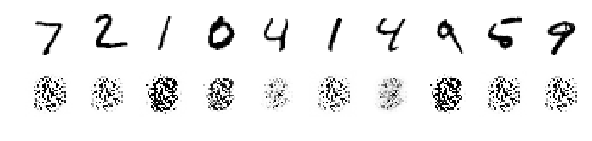

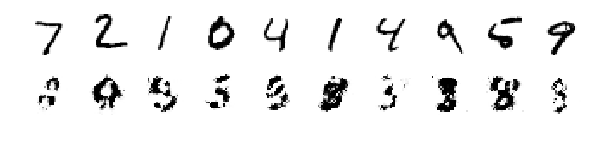

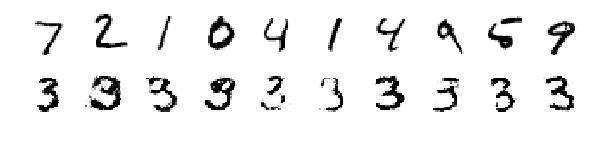

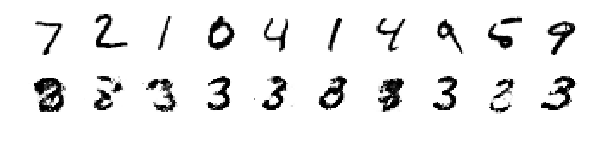

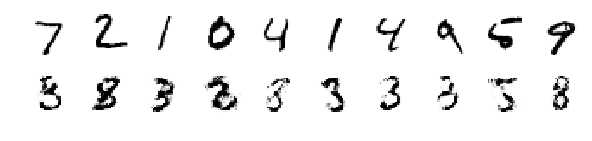

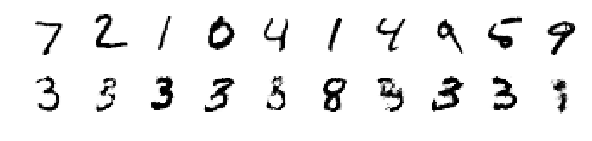

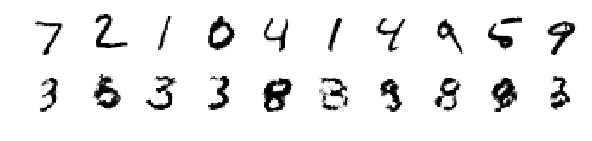

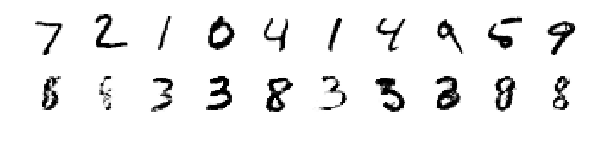

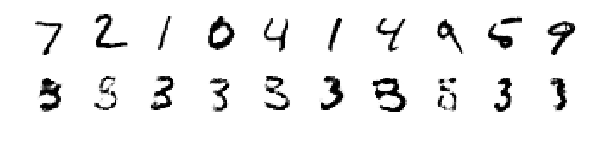

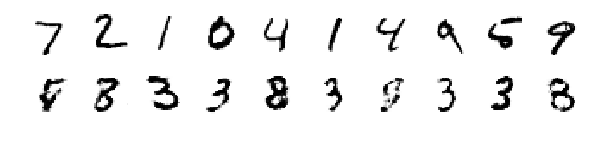

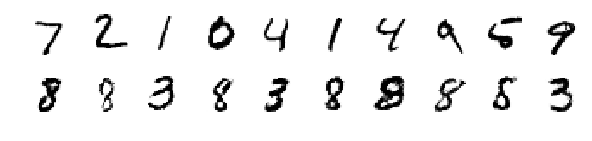

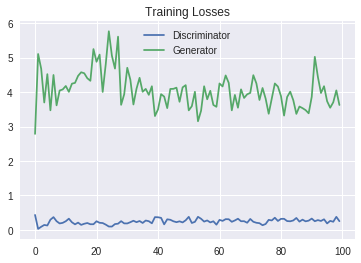

In [7]:
#########
# 신경망 모델 학습
######
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
sess =tf.Session()
sess.run(tf.global_variables_initializer())
total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0
losses = []
for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, z_dim)

        _, loss_val_D = sess.run([train_D, loss_D],
                                 feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G],
                                 feed_dict={ Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))
    losses.append((loss_val_D, loss_val_G))

    #########
    # 학습이 되어가는 모습을 보기 위해 주기적으로 레이블에 따른 이미지를 생성하여 저장
    ######
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size,z_dim)
        samples = sess.run(G,
                           feed_dict={Z: noise})

        fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

        for i in range(sample_size):
            ax[0][i].set_axis_off()
            ax[1][i].set_axis_off()

            ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
            ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

        plt.savefig('{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        #plt.close(fig)

print('최적화 완료!')

sess.close()   
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()